In [1]:
import math
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import random


In [3]:
f = open('Москва_2021.txt', "r")
data = []
for line in f:
    line = line.strip()
    if line:  
        number = int(line) 
        data.append(number)
    

In [1142]:
print(data)

[23, 32, 27, 26, 44, 49, 63, 34, 66, 66, 38, 27, 28, 35, 26, 46, 62, 44, 22, 35, 31, 31, 27, 37, 32, 49, 31, 22, 18, 29, 30, 20, 31, 18, 69, 36, 28, 38, 62, 25, 38, 32, 31, 18, 48, 38, 40, 21, 25, 27, 44, 45, 29, 41, 24, 19, 29, 67, 41, 44, 25, 22, 42, 40, 21, 44, 29, 34, 63, 32, 49, 34, 35, 23, 45, 26, 36, 46, 36, 45, 38, 31, 24, 29, 41, 31, 27, 41, 33, 20, 45, 25, 40, 41, 32, 20, 41, 41, 57, 47, 22, 63, 21, 43, 19, 30, 25, 41, 44, 27, 34, 33, 26, 47, 19, 43, 48, 30, 19, 33, 36, 29, 27, 36, 45, 34, 20, 48, 32, 20, 66, 23, 48, 26, 43, 26, 22, 41, 19, 55, 21, 43, 45, 34, 25, 49, 19, 35, 51, 18, 34, 24, 42, 19, 37, 21, 31, 34, 32, 47, 49, 23, 35, 24, 29, 48, 29, 36, 34, 39, 39, 25, 23, 52, 31, 33, 48, 35, 24, 25, 28, 30, 34, 34, 19, 29, 39, 33, 38, 25, 47, 19, 31, 19, 22, 27, 27, 24, 38, 31, 33, 27, 22, 25, 32, 28, 24, 48, 37, 18, 28, 23, 56, 38, 30, 38, 29, 36, 19, 40, 41, 25, 26, 36, 25, 51, 22, 23, 21, 27, 21, 32, 42, 49, 26, 29, 27, 18, 30, 38, 22, 25, 25, 48, 21, 38, 49, 60, 64, 29,

1. Из генеральной совокупности сгенерировать 36 выборок одинакового
объема, для каждой из которых найти выборочную среднюю. Объем
определить по схеме повторной выборки так, чтобы с надежностью γ = 0,95
обеспечить точность оценки математического ожидания δ = 3 года.

In [1143]:
gamma = 0.95
delta = 3
t = 1.96
sigma = np.std(data)

n = int(np.ceil(t**2 * sigma**2 / delta**2))
print('Объем выборки: ', n)

samples = []
means_of_samples = []
for i in range(36):
    sample = np.random.choice(data, size=n, replace=True)
    samples.append(sample)
    sample_mean = np.mean(sample)
    means_of_samples.append(sample_mean)

print("Объем каждой выборки:", n)
print("Выборочные средние для каждой выборки:", means_of_samples)

62
Объем каждой выборки: 62
Выборочные средние для каждой выборки: [np.float64(35.096774193548384), np.float64(35.45161290322581), np.float64(34.70967741935484), np.float64(34.5), np.float64(35.596774193548384), np.float64(35.693548387096776), np.float64(37.03225806451613), np.float64(32.903225806451616), np.float64(37.08064516129032), np.float64(32.064516129032256), np.float64(38.693548387096776), np.float64(36.67741935483871), np.float64(34.75806451612903), np.float64(35.193548387096776), np.float64(36.88709677419355), np.float64(37.45161290322581), np.float64(35.354838709677416), np.float64(34.516129032258064), np.float64(35.145161290322584), np.float64(36.11290322580645), np.float64(35.145161290322584), np.float64(38.16129032258065), np.float64(35.064516129032256), np.float64(34.32258064516129), np.float64(34.61290322580645), np.float64(34.016129032258064), np.float64(34.83870967741935), np.float64(34.096774193548384), np.float64(36.16129032258065), np.float64(35.29032258064516), n

2. На основании полученных значений выборочных средних построить
интервальный ряд распределения, в котором левая граница – округленное
вниз минимальное значение выборочной средней, правая граница –
округленное вверх максимальное значение выборочной средней, длина
интервала – 1 год. Вычислить относительные частоты, построить
гистограмму.

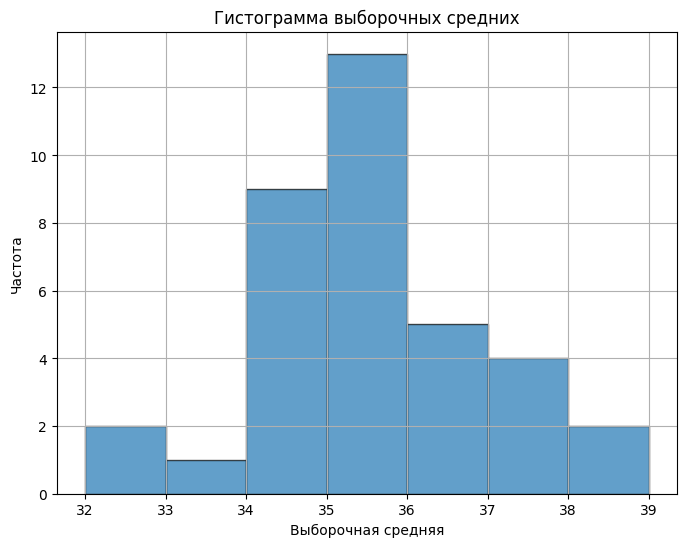

Интервал: [32.0, 33.0], Относительная частота: 0.05555555555555555
Интервал: [33.0, 34.0], Относительная частота: 0.027777777777777776
Интервал: [34.0, 35.0], Относительная частота: 0.25
Интервал: [35.0, 36.0], Относительная частота: 0.3611111111111111
Интервал: [36.0, 37.0], Относительная частота: 0.1388888888888889
Интервал: [37.0, 38.0], Относительная частота: 0.1111111111111111
Интервал: [38.0, 39.0], Относительная частота: 0.05555555555555555


In [1144]:
min_mean = np.floor(min(means_of_samples))
max_mean = np.ceil(max(means_of_samples))
bins = np.arange(min_mean, max_mean + 1, 1)

hist, bin_edges = np.histogram(means_of_samples, bins=bins, density=False) #hist: Массив с частотами (количество значений, попавших в каждый интервал). Это важная часть, которая показывает, сколько данных попало в каждый бин.bin_edges: Массив с границами интервалов (или “бинсов”). Это массив длиной на 1 больше, чем количество бинов, потому что включает и левую, и правую границы каждого интервала.

relative_frequencies = hist / len(means_of_samples)


plt.figure(figsize=(8, 6))
plt.hist(means_of_samples, bins=bins, edgecolor='black', alpha=0.7, density=False)

plt.title("Гистограмма выборочных средних")
plt.xlabel("Выборочная средняя")
plt.ylabel("Частота")

plt.grid(True)
plt.show()

for i in range(len(bins) - 1):
    print(f"Интервал: [{bins[i]}, {bins[i+1]}], Относительная частота: {relative_frequencies[i]}")

3. Осуществить выравнивание статистического ряда, найдя точечные
оценки нормального распределения методом моментов. Построить кривую
Гаусса, аппроксимировав ею гистограмму частот.

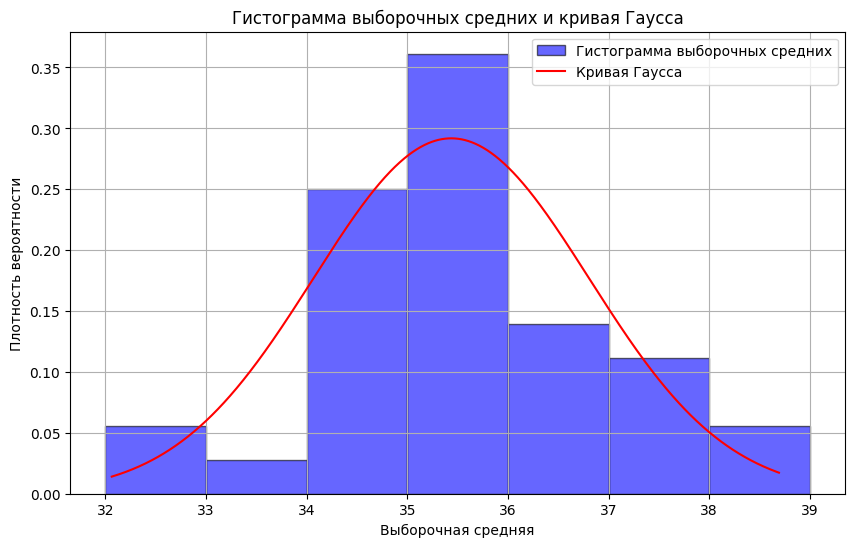

Оценка математического ожидания (mean): 35.43772401433692
Оценка стандартного отклонения (std_dev): 1.3681456975396211


In [1145]:
mean = np.mean(means_of_samples)
std_dev = np.std(means_of_samples)

hist, bin_edges = np.histogram(means_of_samples, bins=bins, density=True)

x = np.linspace(min(means_of_samples), max(means_of_samples), 1000)
gaussian_curve = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2) #Формула плотности вероятности нормального распределения
plt.figure(figsize=(10, 6))
plt.hist(means_of_samples, bins=bins, density=True, alpha=0.6, color='b', edgecolor='black', label='Гистограмма выборочных средних')
plt.plot(x, gaussian_curve, color='r', label='Кривая Гаусса')

plt.title("Гистограмма выборочных средних и кривая Гаусса")
plt.xlabel("Выборочная средняя")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True)
plt.show()

print(f"Оценка математического ожидания (mean): {mean}")
print(f"Оценка стандартного отклонения (std_dev): {std_dev}")

4. На основании одной из сгенерированных выборок найти
доверительный интервал для оценки математического ожидания случайной
величины «возраст» с надежностью 0,95, предполагая, что среднее
квадратическое отклонение неизвестно.

In [1146]:
s = samples[0]
s_mean = np.mean(s)
s_std = np.std(s, ddof=1)
s_std2 = np.std(s)

t = 2.0
delta = t * s_std / np.sqrt(n)
interval = (s_mean - delta, s_mean + delta)
print(f"Выборочная средняя: {s_mean}")
print(f"Выборочное стандартное отклонение: {s_std}")
print(f"Доверительный интервал: {interval}")
print(delta)
print(s_std)
print(s_std2)

Выборочная средняя: 35.096774193548384
Выборочное стандартное отклонение: 11.084932436803728
Доверительный интервал: (np.float64(32.28119853902317), np.float64(37.912349848073596))
2.815575654525209
11.084932436803728
10.99517442162309
